            Product_ID Sales_Rep Region  Sales_Amount  Quantity_Sold  \
Sale_Date                                                              
2023-02-03        1052       Bob  North       5053.97             18   
2023-04-21        1093       Bob   West       4384.02             17   
2023-09-21        1015     David  South       4631.23             30   
2023-08-24        1072       Bob  South       2167.94             39   
2023-03-24        1061   Charlie   East       3750.20             13   

           Product_Category  Unit_Cost  Unit_Price Customer_Type  Discount  \
Sale_Date                                                                    
2023-02-03        Furniture     152.75      267.22     Returning      0.09   
2023-04-21        Furniture    3816.39     4209.44     Returning      0.11   
2023-09-21             Food     261.56      371.40     Returning      0.20   
2023-08-24         Clothing    4330.03     4467.75           New      0.02   
2023-03-24      Electronics

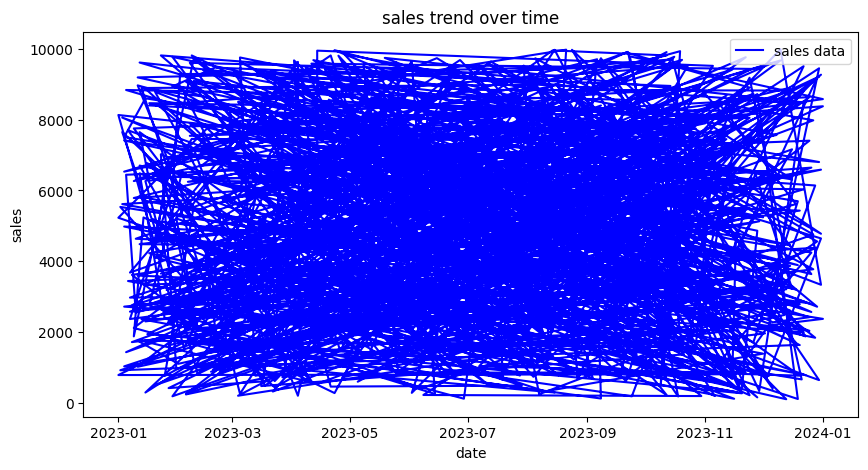

ADF Statistic: -30.416398670618502
P-Value: 0.0
the data is stationary.


C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\moham\anaconda3\envs\myenv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Forcasted sales for next 10 periods:
 2024-02-29     78221.778605
2024-03-31     74397.749711
2024-04-30     99405.334104
2024-05-31    106821.947486
2024-06-30    120741.637435
2024-07-31    129149.237736
2024-08-31    138459.729604
2024-09-30    145628.658770
2024-10-31    152420.430847
2024-11-30    158114.363980
Freq: ME, Name: predicted_mean, dtype: float64


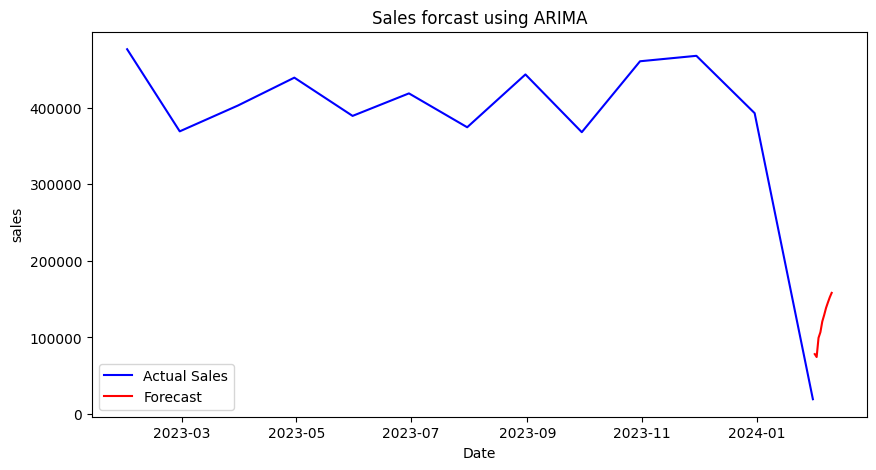

In [12]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


#Load the dataset(assuming 'sales.csv') with data and sales columns
#load and inspect the dataset
df = pd.read_csv('sales_data.csv', parse_dates=['Sale_Date'], index_col='Sale_Date')


#display first five rows of dataset
print(df.head())

#check the missing values
print("\nMissing values:")
print(df.isnull().sum())


# visualize sales trends
#plot sales over time
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales_Amount'], label='sales data', color='blue')
plt.xlabel("date")
plt.ylabel("sales")
plt.title("sales trend over time")
plt.legend()
plt.show()


#check stationarity (Dickey-fuller test)
from statsmodels.tsa.stattools import adfuller

#perform dicky-fuller test
result = adfuller(df['Sales_Amount'])
print(f"ADF Statistic: {result[0]}")
print(f"P-Value: {result[1]}")


if result[1] > 0.05:
    print("the data non stationary.Diffrencing is needed.")
else:
    print("the data is stationary.")
df = df.sort_index()
df = df.resample('ME').sum()
    
#fit ARIM Mdel (assuming p=2, d=1, q=2 based an ACF/PACF)
model = ARIMA(df['Sales_Amount'], order=(2,1,2))
model_fit = model.fit()

#forecast next 10 periods
forecast = model_fit.forecast(steps=10)
print("Forcasted sales for next 10 periods:\n", forecast)

#visualize forcast
forecast_index = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=10, freq='D')
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Sales_Amount'], label="Actual Sales", color='blue')
plt.plot(forecast_index, forecast, label="Forecast", color="red")
plt.xlabel("Date")
plt.ylabel("sales")
plt.title("Sales forcast using ARIMA")
plt.legend()
plt.show()

   age  sex   chest pain type  resting blood pressure  serum cholestoral  \
0   70     1                4                     130                322   
1   67     0                3                     115                564   
2   57     1                2                     124                261   
3   64     1                4                     128                263   
4   74     0                2                     120                269   

   fasting blood sugar  resting electrocardiographic results  max heart rate  \
0                    0                                     2             109   
1                    0                                     2             160   
2                    0                                     0             141   
3                    0                                     0             105   
4                    0                                     2             121   

   exercise induced angina  oldpeak  ST segment  major vessels

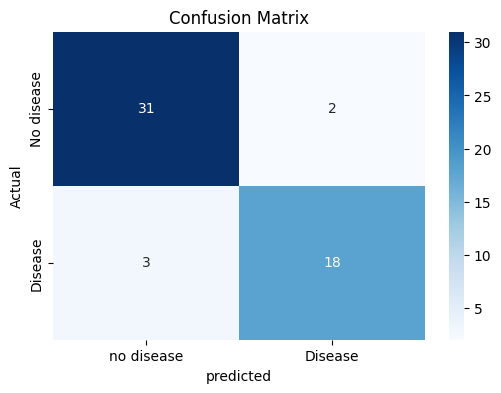

In [5]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#Load and inspect the dataset
df = pd.read_csv("dataset_heart.csv")

#disply first five rows
print(df.head())

#check for missing values
print("\nMissing values:")
print(df.isnull().sum())

#define feature (X) and target variable (y)
X = df.drop(columns=['heart disease'])
y = df['heart disease']

 # standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
#split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

#train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#predict on test model
y_pred = model.predict(X_test)

#predict accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


#ploting confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["no disease", "Disease"], yticklabels=["No disease", "Disease"])
plt.xlabel("predicted")                                                                                                                                
plt.ylabel("Actual")  
plt.title("Confusion Matrix")
plt.show()                                                                                                     